<a href="https://colab.research.google.com/github/ksachdeva/ml-in-hurry/blob/master/Machine_Learning_In_Hurry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>>>> <img src="https://media.giphy.com/media/l41lUYsrdGwRowfss/giphy.gif" alt="" title="" />  

>>>>>> # Machine Learning In Hurry

# Python module imports

In [0]:
# Install all the dependencies

# Various imports
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import HTML

#Mathematics Review

##  Polynomials

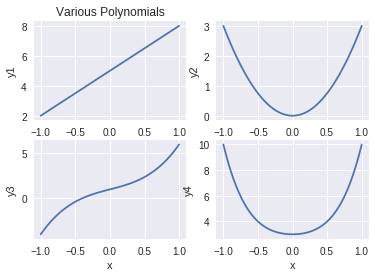

In [4]:
# get evenly spaced numbers over a specified interval.
x1 = np.linspace(-1, 1, 100)  

y1 = (3*x1 + 5)               # degree 1, binomial
y2 = (3*x1**2)                # degree 2, monomial
y3 = (3*x1**3 + 2*x1 + 1)     # degree 3, binomial
y4 = (4*x1**4 + 3*x1**2 + 3)  # degree 4, trinomial

# let's plot them
plt.subplot(2, 2, 1)
plt.plot(x1, y1)
plt.title('Various Polynomials')
plt.ylabel('y1')
plt.xlabel('x')

plt.subplot(2, 2, 2)
plt.plot(x1, y2)
plt.ylabel('y2')
plt.xlabel('x')

plt.subplot(2, 2, 3)
plt.plot(x1, y3)
plt.ylabel('y3')
plt.xlabel('x')

plt.subplot(2, 2, 4)
plt.plot(x1, y4)
plt.ylabel('y4')
plt.xlabel('x')

plt.show()

## Functions

### Math vs Programming 


> $y$ = $3x$ + 5


The above expression can also be written as 


> $f(x)$  = $3x$ + 5


If we were to use a programming language to implement above we would write it as :


```python
# a python function
def myFun(x):
  return 3*x + 5

y = myFun(45)

```

```javascript
// a javascript function
function myFun(x) {
  return 3*x + 5
}

var y = myFun(5)

```

Pretty similar however for the same function

* mathematician will say that  $y$ is  a **dependent** variable and $x$ is an **independent** variable.

* programmer will say that $x$ is an **input** (or **parameter** or **argument**) and $y$ is an **output** and the name of function is **myFun**.


Now let's consider this -


```python
# a python function
def myFun2(x):
  x2 = 3*x + 5
  x3 = makeHttpCall(x2)    # <-- introduces side effects
  return x3

y = myFun(45)

```

While above is still a function from a programming language point of view it is not a **pure** function. In other words it has **side effects**. 



### Types of functions

*Univariate function*  (=> 1 independent variable)

> $f(x)$ = $y = 3x + 5$

*Bivariate function* (=> 2 independent variables)

> $f(x,z)$ = $y = 3x + 7z + 3$ 

*Multivariate function*  (=> 2 or more independent variables)

> $f(x,z,a)$ = $y = 3x + 7z + 9a + 32$



### Difference between mathematical functions & programming language functions

> In $y = 3x + 7z + 5$,  

>> 3 is called a **coefficient** or **weight** of $x$

>> 7 is called a **coefficient** or **weight** of $z$

>> 5 is called **bias**

> Collectively 3, 7, and 5 are called **parameters**   <----- note this is different from programming languages where **inputs** of a function are also called **parameters**


### Now, let's try to write the equation in a general form


> $y$ = $w_1x + w_2z + b$ 

>> or better 

> $y$ = $w_1x_1 + w_2x_2 + b$ 

>> where


>$x_1$, $x_2$ are called **dependent variables** or **features**.

>> # ** YES ONE MORE NAME FOR THE SAME THING :( **

>> ![alt text](https://media.giphy.com/media/vh9isNb4S2Spa/giphy.gif)


### Composing functions in mathematics and functional programming

> Given two functions -

> $f(x) = 3x + 5$

> $g(x) = 7x^2 + 4$


> you can compose them as :  $y = f(g(x))$


**Note - Using above style of functional composition when doing regular programming will provide you enormous benefits over procedural and object oriented programming !!**


## Differential Calculus

Mathematics of computing the change in the **output** ($y$ or $f(x)$) for a very tiny change in the **input** (dependent variable(s))

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Tangent-calculus.svg/300px-Tangent-calculus.svg.png)


$f'(x)$ = $\frac{dy}{dx}$













In [37]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/WUvTyaaNkzM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

#Fitting the curve

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Curve_fitting.svg/300px-Curve_fitting.svg.png)

### Generate synthetic data that has some linear relationship

In [38]:
# let's generate some random points which based on a linear (polynomial of degree 1)
def generate_synthetic_data(num_samples):
  X = np.array(range(num_samples))
  random_noise = np.random.uniform(-10,90,size=num_samples)
  
  # this is our linear equation
  # coefficient or weight is 3.65
  # bias is random (but uniform)
  y = 3.65*X + random_noise     # <------- PAY ATTENTION TO THIS !!
  
  return X,y


# generate
X, y = generate_synthetic_data(30)

# let's have a look at the generated data
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns=['X', 'y'])
df.head(n=5)

,X,y
0,0.0,49.200541
1,1.0,65.343597
2,2.0,46.090583
3,3.0,57.429581
4,4.0,26.301081


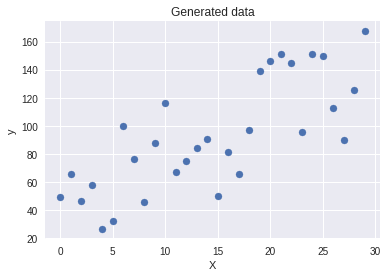

In [39]:
# visualize the generated data
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Which polynomial will describe our dataset the best ? 


>>  ![alt text](https://media.giphy.com/media/2wWBMyd02oMVJqTPZW/giphy.gif)





#### Guess the parameters !!  ..... SERIOUSLY 

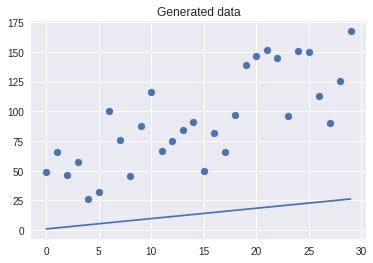

In [40]:
# Let's guess W1 and b and plot the resulting line

w1 = 0.87
b  = 0.98

y_pred = w1*X + b


plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.plot(X, y_pred)

plt.show()


#### Find the residual or how far away the curve is from the actual points

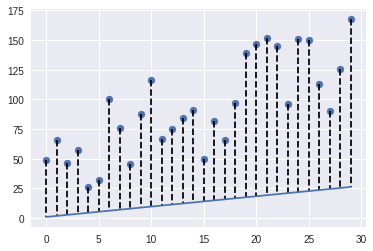

In [41]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, y_pred)

# find the difference between
# predicted and actual value
dy = y_pred - y    # <---- residual (or loss !)

ax.vlines(X,y,y+dy, linestyles='dashed')

plt.show()

### Compute the cost of the prediction (or should I say @@ GUESS @@)

In [42]:
# See the loss per sample 
loss = (y - y_pred)
print(loss)

[ 48.22054148  63.49359724  43.37058307  53.83958114  21.84108079
  26.76358406  93.87977474  69.11777006  37.2469818   79.09426158
 106.3281041   56.36824966  63.33944809  71.86573117  77.51444176
  35.69986794  66.55968471  49.83932006  80.20108694 121.51290863
 127.89389892 132.24540837 124.62084486  74.67325468 129.18567768
 126.89354287  89.10378779  65.54725037  99.80582997 141.19600989]


#### Mean Squared Error

> $loss$ = $(y - y__pred)$

Above way of computing the loss does not take care of the negative and does not bring up to scale and hence 
we take the square of it to remove the **negativity**.

We also intend to take the average (mean) of the loss across all the samples and hence **Mean Squared Error** (or **MSE** for short !)



In [43]:
# Mean squared error
mse = (np.square(y - y_pred)).mean(axis=0)
print(f"Mean squared error for all samples {mse}")

Mean squared error for all samples 7416.481399091727


---

Let's write our loss i.e.

```python
mse = (np.square(y - y_pred)).mean(axis=0)
```

as a mathematical function

> $f(w_1, b)$ = $\frac{1}{N}\sum_{i=1}^{N} (y - (w_1x + b))^2$


Essentially, we now have a function (called loss function) that depends on ($w_1$ and $b$) and is of **quadratic in nature (i.e. is of degree 2)**


### Goal is to reduce/minimise the MSE !!

Since it is clear that the our loss function i.e. $f(w_1,b)$ depends on $w_1$ and $b$, so if we could adjust their values in such a way that value of $f(w_1,b)$ approaches **ZERO** !!

>> **BUT THIS BRINGS UP FOLLOWING QUESTIONS**


*Should we add to w1 and b ? or remove ? *

>> <img width=80 height=80 src="https://media.giphy.com/media/hTD23t0ABhv3SYCAGk/giphy.gif">

*And what should we add and/or remove to $w_1$ and $b$ ? *

>> <img width=80 height=80 src="https://media.giphy.com/media/4N1H43j8owKK24V2j6/giphy.gif">

### Gradient descent


![alt text](https://developers.google.com/machine-learning/crash-course/images/convex.svg)

![alt text](https://i.ytimg.com/vi/b4Vyma9wPHo/maxresdefault.jpg)

In [0]:
class GradientDescentExample(object):
  def __init__(self):
    
    # create a range of weights
    w_min = -30
    w_max = 30
   
    self.w = np.linspace(w_min, w_max, 200)
    
    self.y = GradientDescentExample.f(self.w)
    
    self.learning_rate = .05  # Learning rate
    
    
    self.w_est = -25   # Starting point (the GUESS !!)
    self.y_est = GradientDescentExample.f(self.w_est)  
    
    
    # code to setup our graph etc
    self.fig, ax = plt.subplots()    
    ax.set_xlim([w_min, w_max])
    ax.set_ylim([-5, 1500])    
    ax.set_xlabel("w")
    ax.set_ylabel("f(w)")
    
    plt.title("Gradient Descent")
    self.line, = ax.plot([], [])
    self.scat = ax.scatter([], [], c="red")
    self.text = ax.text(-25,1300,"")
  
  @staticmethod
  def f(w):
    # loss function to minize
    # This loss function depends on quadratic w
    return w**2 + 5 * w + 24
  
  @staticmethod
  def fd(w):
    # Derivative of the function
    return 2*w + 5  
  
  # @staticmethod
  def animate_fn(self, i):    

    # Gradient descent
    self.w_est = self.w_est - GradientDescentExample.fd(self.w_est) * self.learning_rate
    self.y_est = GradientDescentExample.f(self.w_est)

    # Update the plot
    self.scat.set_offsets([[self.w_est,self.y_est]])
    self.text.set_text("Value : %.2f" % self.y_est)
    self.line.set_data(self.w, self.y)
    return self.line, self.scat, self.text
  
  def run(self):
    anim = animation.FuncAnimation(self.fig, self.animate_fn, 500, interval=1000, blit=True)
    return HTML(anim.to_html5_video())   
    


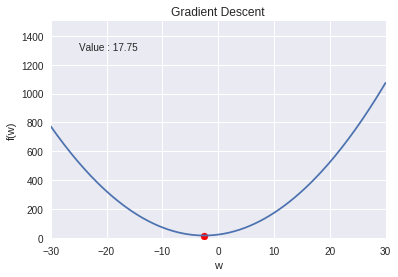

In [12]:
gd_example = GradientDescentExample()
gd_example.run()

In [0]:
# let's first define out cost function 
# so that we can invoke with updated values of w & b

def cost_fn(x, y_actual, w, b):
  y_new_pred = w*x + b
  mse = (np.square(y_actual - y_new_pred)).mean(axis=0)
  return mse
  

In [0]:
def update_parameters(x, y_actual, w, b, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    num_of_samples = len(x)

    # we go over all the samples
    for i in range(num_of_samples):
        # Calculate partial derivatives
        # -2x(y - (wx + b))
        weight_deriv += -2*x[i] * (y[i] - (w*x[i] + b))

        # -2(y - (wx + b))
        bias_deriv += -2*(y[i] - (w*x[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    w -= (weight_deriv / num_of_samples) * learning_rate
    b -= (bias_deriv / num_of_samples) * learning_rate

    return w, b

In [0]:
def train(x, y_actual, w, b, learning_rate, iters):
    cost_history = []
    w_history = []
    b_history = []
    

    for i in range(iters):
        w, b = update_parameters(x, y, w, b, learning_rate)
        w_history.append(w)
        b_history.append(b)

        cost = cost_fn(x, y, w, b)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return w, b, cost_history, w_history, b_history

In [30]:
w, b, cost_history, w_history, b_history = train(X, y, w1, b, 0.0001, 190)

iter: 0 cost: 8528.09989299523
iter: 10 cost: 3388.6784525950056
iter: 20 cost: 1805.3333503302536
iter: 30 cost: 1317.301681433061
iter: 40 cost: 1166.6397106879024
iter: 50 cost: 1119.8919088034984
iter: 60 cost: 1105.1512438703621
iter: 70 cost: 1100.2695092713138
iter: 80 cost: 1098.4247981359415
iter: 90 cost: 1097.5158830423868
iter: 100 cost: 1096.8955610122853
iter: 110 cost: 1096.3644855901734
iter: 120 cost: 1095.8612553643584
iter: 130 cost: 1095.3669576092516
iter: 140 cost: 1094.875766611562
iter: 150 cost: 1094.3858876111315
iter: 160 cost: 1093.89676742887
iter: 170 cost: 1093.4082353075546
iter: 180 cost: 1092.920238280759


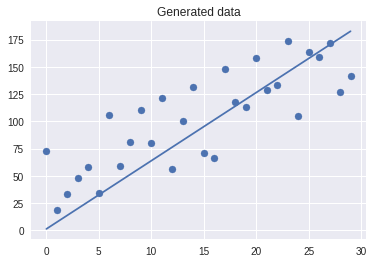

In [32]:
y_pred_2 = w*X + b


plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.plot(X, y_pred_2)
plt.show()

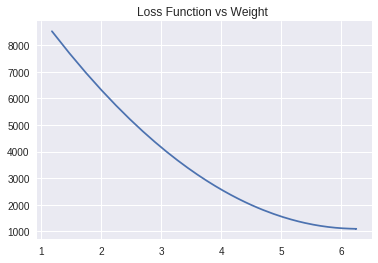

In [33]:
plt.title("Loss Function vs Weight ")
plt.plot(w_history, cost_history)
plt.show()

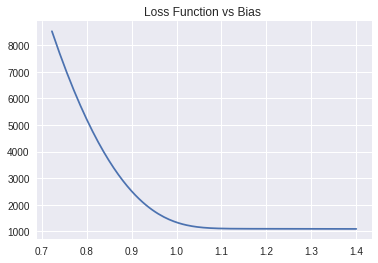

In [34]:
plt.title("Loss Function vs Bias ")
plt.plot(b_history, cost_history)
plt.show()

# Artificial Neural Networks  --> **THE FUNCTION APPROXIMATORS**







![alt text](https://i.stack.imgur.com/xhGPV.png)

![alt text](https://images.xenonstack.com/blog/Working-Of-Artificial-Neuron.jpg)

![alt text](https://cdn-images-1.medium.com/max/1200/0*tUvxnJOc9dxEziaZ.jpg)

# Machine learning branches

![alt text](https://raw.githubusercontent.com/trekhleb/homemade-machine-learning/master/images/machine-learning-map.png)

# What is the relation with Artificial Intelligence ?

![alt text](https://i.pinimg.com/originals/08/fa/69/08fa6996cac1b67224cc97e502c799dd.jpg)